In [ ]:
# Visualizing the results of principal components analysis

import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP
import seaborn as sns

c:\Users\Михаил\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.color_palette().as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [3]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [4]:
PC = pd.read_excel('Principal_components.xlsx', sheet_name='PC')

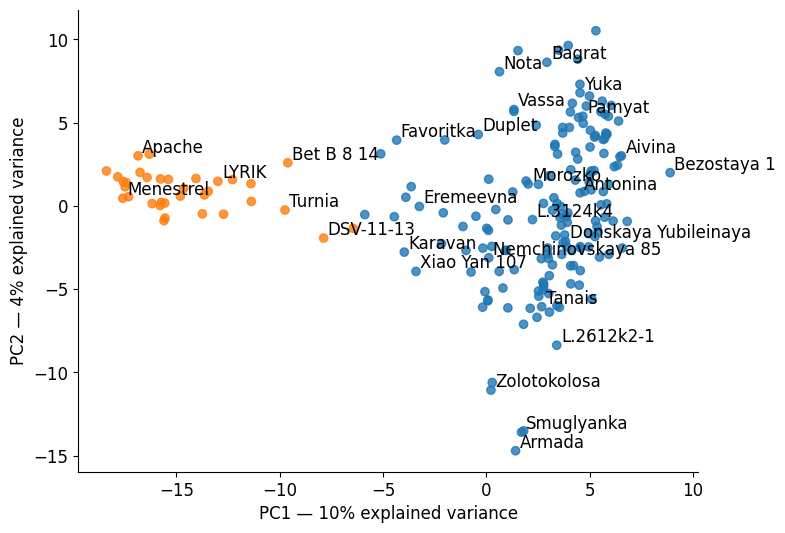

In [5]:
font_size = 12
label_font_size = 12
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.axes().spines[['right', 'top']].set_visible(False)
plt.scatter(
    PC[PC.columns[1]],
    PC[PC.columns[2]],
    marker='o',
    c=[sns.color_palette().as_hex()[int(PC['Subpopulation'][i] - 1)] for i in range(len(PC['Subpopulation']))],
    alpha=0.8)
labels = PC[PC.columns[0]]
text_coords = []
for i, txt in enumerate(labels):
    coords = (PC[PC.columns[1]][i]+0.2, PC[PC.columns[2]][i]+0.2)
    should_be_labelled = True
    for j in text_coords:
        if abs(j[0] - coords[0]) < 2:
            if abs(j[1] - coords[1]) < 1.1:
              should_be_labelled = False  
    if should_be_labelled:
        txt = txt.replace('_', ' ')
        plt.annotate(txt, coords).set_fontsize(label_font_size)
    text_coords.append(coords)
plt.xlabel(r'PC1 — 10% explained variance').set_fontsize(font_size)
plt.ylabel(r'PC2 — 4% explained variance').set_fontsize(font_size)
plt.savefig('PC1-PC2.svg', bbox_inches = 'tight')
plt.show()

In [6]:
import math
def combine_hex_values(d):
  d_items = sorted(d.items())
  tot_weight = sum(d.values())
  if tot_weight == 0:
    return '#000000'
  for value in d.values():
    if math.isnan(value):
      return '#000000'
  red = int(sum([int(k[1:3], 16)*v for k, v in d_items])/tot_weight)
  green = int(sum([int(k[3:5], 16)*v for k, v in d_items])/tot_weight)
  blue = int(sum([int(k[5:7], 16)*v for k, v in d_items])/tot_weight)
  zpad = lambda x: x if len(x)==2 else '0' + x
  return '#' + zpad(hex(red)[2:]) + zpad(hex(green)[2:]) + zpad(hex(blue)[2:])

color_a = sns.color_palette().as_hex()[0]
color_b = sns.color_palette().as_hex()[1]

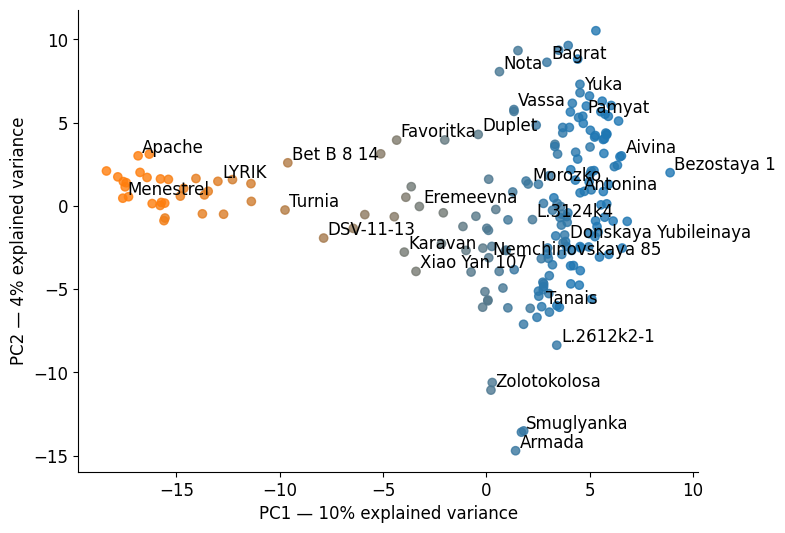

In [7]:
font_size = 12
label_font_size = 12
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size
plt.axes().spines[['right', 'top']].set_visible(False)
plt.scatter(
    PC[PC.columns[1]],
    PC[PC.columns[2]],
    marker='o',
    c=[combine_hex_values({color_a: PC['SP1'][i], color_b: PC['SP2'][i]}) for i in range(len(PC['SP1']))],
    alpha=0.8)
labels = PC[PC.columns[0]]
text_coords = []
for i, txt in enumerate(labels):
    coords = (PC[PC.columns[1]][i]+0.2, PC[PC.columns[2]][i]+0.2)
    should_be_labelled = True
    for j in text_coords:
        if abs(j[0] - coords[0]) < 2:
            if abs(j[1] - coords[1]) < 1.1:
              should_be_labelled = False  
    if should_be_labelled:
        txt = txt.replace('_', ' ')
        plt.annotate(txt, coords).set_fontsize(label_font_size)
    text_coords.append(coords)
plt.xlabel(r'PC1 — 10% explained variance').set_fontsize(font_size)
plt.ylabel(r'PC2 — 4% explained variance').set_fontsize(font_size)
plt.savefig('PC1-PC2_mixed_color.svg', bbox_inches = 'tight')
plt.show()

In [8]:
PC[PC.columns[1:9]].head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.671006,-6.060407,-4.470966,8.617198,2.740413,-4.252919,-2.741881,-0.094180
1,-3.246756,-0.042315,-0.460170,4.280282,3.899417,-0.520756,0.493462,-4.122868
2,-17.596617,0.455829,2.527536,1.314202,0.364025,-2.467067,0.181165,-0.571006
3,2.516591,-5.126741,-5.611602,10.196567,2.339835,-4.574605,-2.845648,-1.039113
4,-17.482140,1.138570,-0.593920,0.688995,2.607480,1.688544,-0.929023,-0.742958


In [10]:
reducer = UMAP()
embedding = reducer.fit_transform(PC[PC.columns[1:9]], n_neighbors=7)
df_embedding = pd.DataFrame(embedding)
df_embedding.to_excel('UMAP_embedding.xlsx')
print(embedding.shape)

(200, 2)


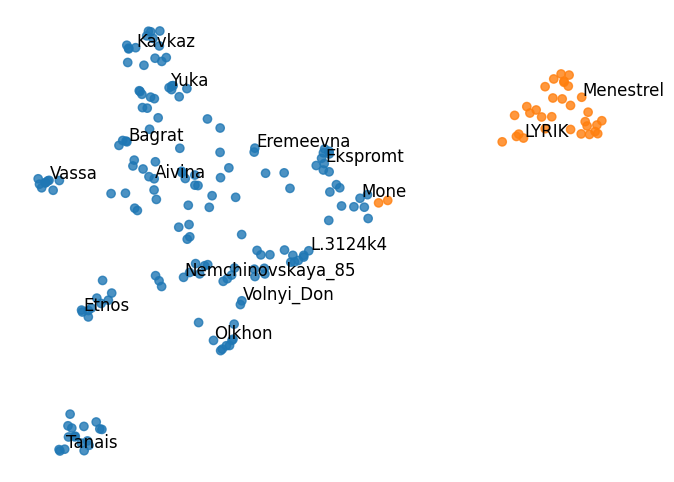

In [12]:
embedding = pd.read_excel('UMAP_embedding.xlsx')

font_size = 12
label_font_size = 12
scale = 1
plt.axes().set_axis_off()
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['xtick.labelsize'] = font_size
plt.rcParams['ytick.labelsize'] = font_size

plt.scatter(
    embedding[0],
    embedding[1],
    marker='o',
    c=[sns.color_palette().as_hex()[int(embedding['Subpopulation'][i]) - 1] for i in range(len(embedding['Subpopulation']))],
    alpha=0.8
    )
labels = PC[PC.columns[0]]
text_coords = []
for i, txt in enumerate(labels):
    coords = (embedding[0][i]+0.02, embedding[1][i]+0.02)
    should_be_labelled = True
    for j in text_coords:
        if abs(j[0] - coords[0]) < scale:
            if abs(j[1] - coords[1]) < (0.55 * scale):
                should_be_labelled = False
    if should_be_labelled:
        plt.annotate(txt, coords).set_fontsize(label_font_size)
    text_coords.append(coords)
plt.savefig('UMAP.svg', bbox_inches = 'tight')
plt.show()